In [1]:
import ase
from mendeleev import Al as elm  # The species
import os
from amstools import *
from ase.lattice.cubic import FaceCenteredCubic
import matplotlib.pyplot as plt
import numpy as np
from ase import io
from ase.optimize import LBFGS
# Load remaining modules
import shutil
import os
import glob
import numpy as np
import copy

In [2]:
def closed(atom,target,dif=[0.1,0.1,0.1]):
    check=[False,False,False]
    for i in range(3):
        if atom[i] > target[i]-dif[i] and atom[i] < target[i]+dif[i]:
            check[i]=True
    return all(check)

## EAM structure

In [3]:
fcc = FaceCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]],
                          size=(1,1,1), symbol=elm.symbol, pbc=(1,1,1),
                          latticeconstant=4.05)

In [4]:
cell=fcc*[6,6,6]
#cell = fcc*(2,2,2)

In [5]:
cell1=cell.copy() # !!! copy
cell1.pop(0)

Atom('Al', [0.0, 0.0, 0.0])

In [6]:
# for divacancy(n = 2 and n p = 1)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2]) 
vecs = [vec_1]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)

2.8637824638055176 [0.    2.025 2.025]


In [7]:
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

Target 1NN, Atom is 3


In [8]:
#!mkdir ./cluster_struc_S6_big
from ase.io import write
cell_base=cell.copy() # divacancy
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S6_big/divac_Al_eam.cfg",cell_base)


In [9]:
write("./cluster_struc_S6_big/Al_eam.cfg",cell)

In [6]:
# for triangle(n = 3 and n p = 3)
distances=[]

a0=4.05
vec_1=np.array([a0/2,a0/2,a0])
vec_2=np.array([a0/2,a0,a0/2])
vec_3=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((3,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy() 
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/tri_Al_eam.cfg",cell_base)


4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 5
Target 2NN, Atom is 26
Target 3NN, Atom is 147


<IPython.core.display.Javascript object>


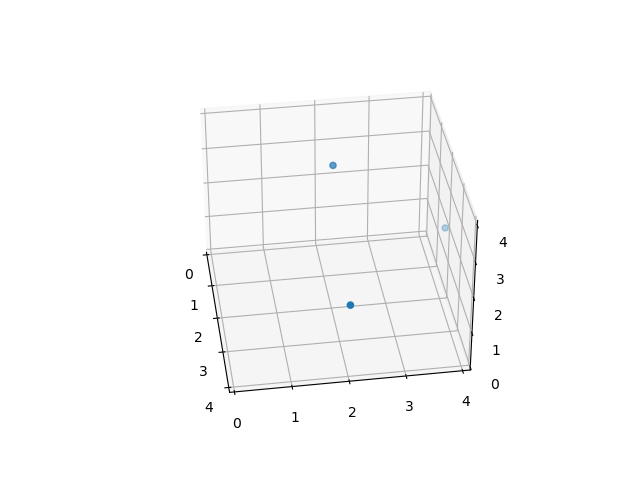

(0.0, 4.05)

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])
ax.set_zlim3d(0,4.05)
ax.set_xlim3d(0,4.05)
ax.set_ylim3d(0,4.05)

In [98]:
# for square(n = 4 and n p = 4)
distances=[]

a0=4.05
vec_2=np.array([0,a0/2,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./square
from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/sqr_Al_eam.cfg",cell_base)


2.8637824638055176 [2.025 2.025 0.   ]
2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 1
Target 2NN, Atom is 3
Target 3NN, Atom is 5
Target 4NN, Atom is 147


<IPython.core.display.Javascript object>


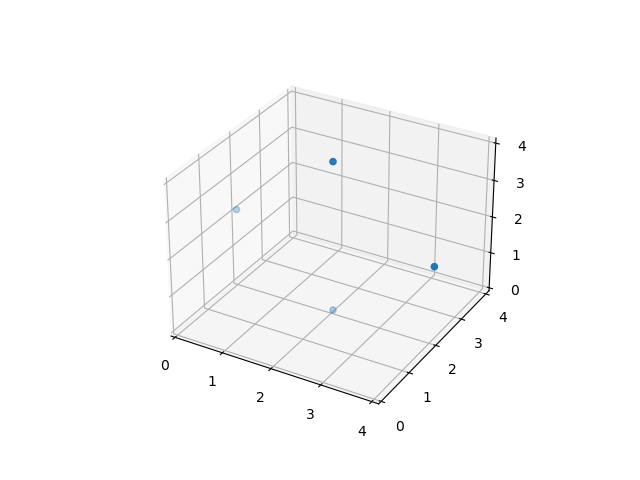

(0.0, 4.05)

In [97]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])
ax.set_zlim3d(0,4.05)
ax.set_xlim3d(0,4.05)
ax.set_ylim3d(0,4.05)

In [99]:
# for bent rhombus(n = 4 and n p = 5)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_3=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./bent_rhombus
from ase.io import write
cell_base=cell.copy()
atm5=cell_base.pop(atom_list[3])
atm4=cell_base.pop(atom_list[0])
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[2])  
write("./cluster_struc_S6_big/b_rhom_Al_eam.cfg",cell_base)


2.8637824638055176 [0.    2.025 2.025]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [2.025 2.025 0.   ]
4.960216729135936 [2.025 2.025 4.05 ]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 1
Target 4NN, Atom is 5


<IPython.core.display.Javascript object>


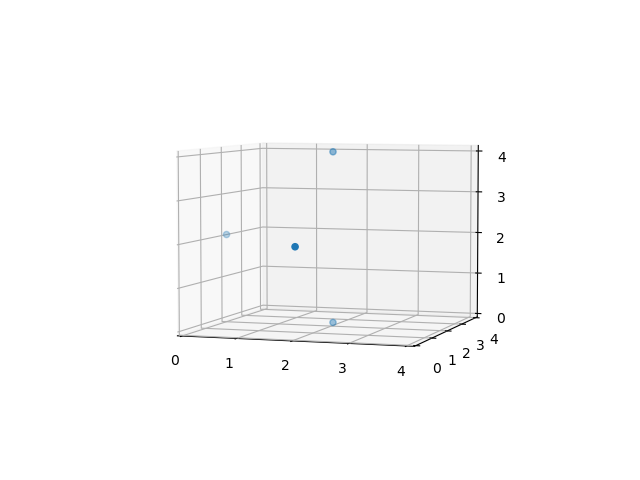

(0.0, 4.05)

In [100]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])
ax.set_zlim3d(0,4.05)
ax.set_xlim3d(0,4.05)
ax.set_ylim3d(0,4.05)

In [103]:
# for tetrahedron(n = 4 and n p = 6)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)


from ase.io import write
cell_base=cell.copy() 
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2]) 
atm2=cell_base.pop(atom_list[1])
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/tetra_Al_eam.cfg",cell_base)


2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 3
Target 2NN, Atom is 5
Target 3NN, Atom is 26
Target 4NN, Atom is 147


<IPython.core.display.Javascript object>


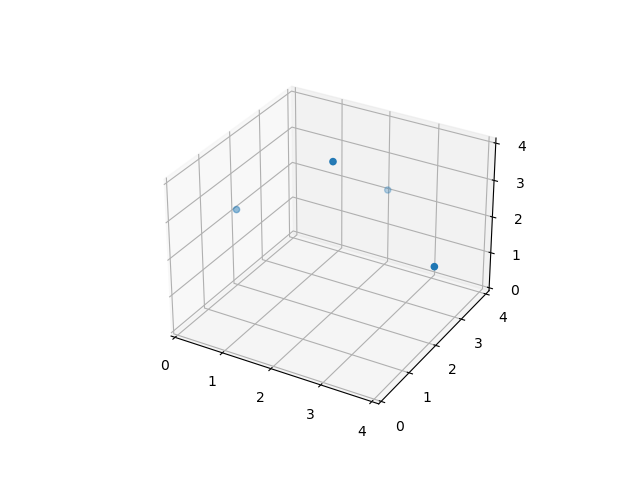

(0.0, 4.05)

In [104]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])
ax.set_zlim3d(0,4.05)
ax.set_xlim3d(0,4.05)
ax.set_ylim3d(0,4.05)

In [105]:
# for pyramid(n = 5 and n p = 8)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_5=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object
atom_list=[]
atom_pos=np.zeros((5,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[4])
atm2=cell_base.pop(atom_list[0])
atm1=cell_base.pop(atom_list[1])
write("./cluster_struc_S6_big/pyramind_Al_eam.cfg",cell_base)


2.8637824638055176 [0.    2.025 2.025]
2.8637824638055176 [2.025 0.    2.025]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 26
Target 4NN, Atom is 147
Target 5NN, Atom is 5


In [63]:
atom_pos[:,2]

array([2.025, 2.025, 2.025, 2.025, 4.05 ])

<IPython.core.display.Javascript object>


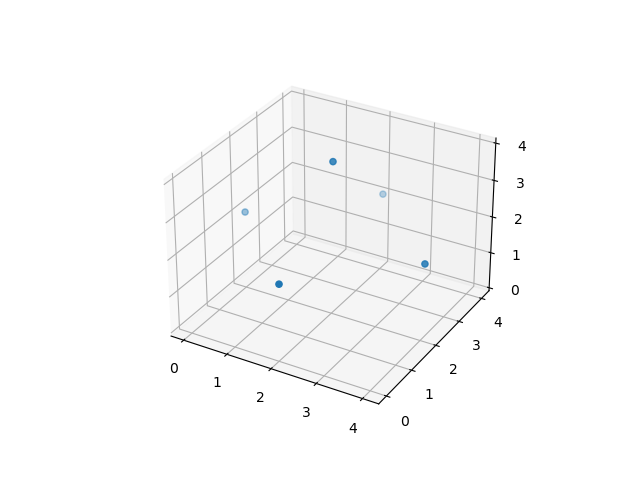

(0.0, 4.05)

In [64]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])
ax.set_zlim3d(0,4.05)

In [106]:
# for octahedron(n = 6 and n p = 12)
distances=[]

a0=4.05
vec_3=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((6,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

2.8637824638055176 [2.025 2.025 0.   ]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 1
Target 2NN, Atom is 2
Target 3NN, Atom is 3
Target 4NN, Atom is 5
Target 5NN, Atom is 26
Target 6NN, Atom is 147


In [107]:
atom_pos[:,0]

array([2.025, 2.025, 0.   , 2.025, 2.025, 4.05 ])

<IPython.core.display.Javascript object>


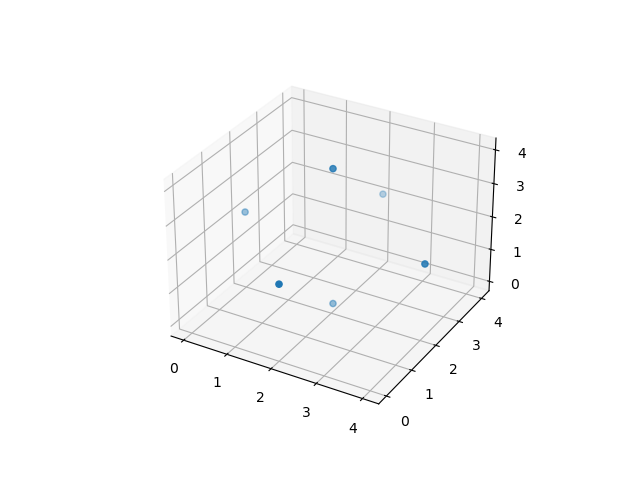

In [108]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])

In [109]:
from ase.io import write
cell_base=cell.copy()
atm6=cell_base.pop(atom_list[5])
atm5=cell_base.pop(atom_list[4])
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/octahedron_Al_eam.cfg",cell_base)


In [110]:
# for CNN(13)
distances=[]

a0=4.05
vec_1=np.array([a0,a0,a0])
vec_2=np.array([a0,a0,0])
vec_3=np.array([a0,0,a0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0/2,0,a0/2])
vec_7=np.array([a0/2,a0/2,0])
vec_8=np.array([a0+a0/2,a0/2,a0])
vec_9=np.array([a0+a0/2,a0/2,0])
vec_10=np.array([a0+a0/2,0,a0/2])
vec_11=np.array([a0+a0/2,a0,a0/2])
vec_12=np.array([a0,a0/2,a0/2])
vec_13=np.array([a0,0,0])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((13,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

7.014805770653953 [4.05 4.05 4.05]
5.727564927611035 [4.05 4.05 0.  ]
5.727564927611035 [4.05 0.   4.05]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [2.025 2.025 0.   ]
7.57685620821723 [6.075 2.025 4.05 ]
6.403612261840967 [6.075 2.025 0.   ]
6.403612261840967 [6.075 0.    2.025]
7.576856208217231 [6.075 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
4.05 [4.05 0.   0.  ]
Target 1NN, Atom is 172
Target 2NN, Atom is 168
Target 3NN, Atom is 148
Target 4NN, Atom is 5
Target 5NN, Atom is 26
Target 6NN, Atom is 2
Target 7NN, Atom is 1
Target 8NN, Atom is 149
Target 9NN, Atom is 145
Target 10NN, Atom is 146
Target 11NN, Atom is 170
Target 12NN, Atom is 147
Target 13NN, Atom is 144


<IPython.core.display.Javascript object>


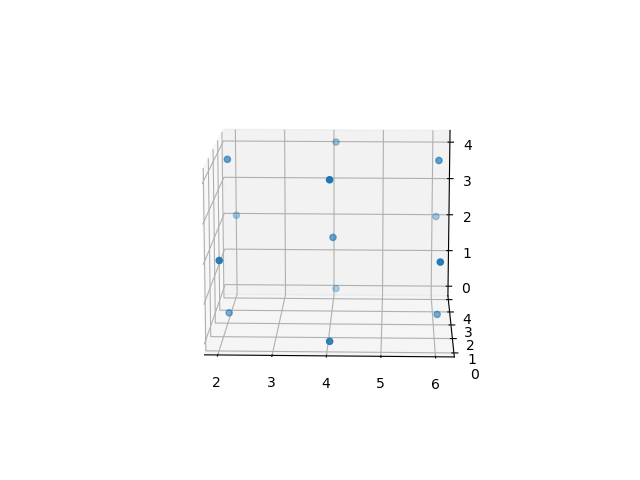

In [111]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(atom_pos[:,0],atom_pos[:,1],atom_pos[:,2])

In [112]:
from ase.io import write
cell_base=cell.copy()
atm6=cell_base.pop(atom_list[0])
atm5=cell_base.pop(atom_list[10])
atm4=cell_base.pop(atom_list[1])
atm3=cell_base.pop(atom_list[7])
atm2=cell_base.pop(atom_list[2])
atm1=cell_base.pop(atom_list[11])
atm7=cell_base.pop(atom_list[9])
atm8=cell_base.pop(atom_list[8])
atm9=cell_base.pop(atom_list[12])
atm10=cell_base.pop(atom_list[4])
atm11=cell_base.pop(atom_list[3])
atm12=cell_base.pop(atom_list[5])
atm13=cell_base.pop(atom_list[6])
write("./cluster_struc_S6_big/13_eam.cfg",cell_base)

## ACE structures

In [17]:
fcc = FaceCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]],
                          size=(1,1,1), symbol=elm.symbol, pbc=(1,1,1),
                          latticeconstant=4.04)

In [18]:
cell=fcc*[6,6,6]

In [19]:
cell1=cell.copy() # !!! copy
cell1.pop(0)

Atom('Al', [0.0, 0.0, 0.0])

In [20]:
# for divacancy(n = 2 and n p = 1)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2]) 
vecs = [vec_1]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)

2.856711395993652 [0.   2.02 2.02]


In [21]:
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

Target 1NN, Atom is 3


In [22]:
from ase.io import write
cell_base=cell.copy() # divacancy
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S6_big/divac_Al_ace.cfg",cell_base)

In [23]:
write("./cluster_struc_S6_big/Al_ace.cfg",cell)

In [113]:
# for triangle(n = 3 and n p = 3)
distances=[]

a0=4.04
vec_1=np.array([a0/2,a0/2,a0])
vec_2=np.array([a0/2,a0,a0/2])
vec_3=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((3,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy() 
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/tri_Al_ace.cfg",cell_base)


4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 5
Target 2NN, Atom is 26
Target 3NN, Atom is 147


In [114]:
# for square(n = 4 and n p = 4)
distances=[]

a0=4.04
vec_2=np.array([0,a0/2,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./square
from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/sqr_Al_ace.cfg",cell_base)

2.856711395993652 [2.02 2.02 0.  ]
2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 1
Target 2NN, Atom is 3
Target 3NN, Atom is 5
Target 4NN, Atom is 147


In [115]:
# for bent rhombus(n = 4 and n p = 5)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_3=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./bent_rhombus
from ase.io import write
cell_base=cell.copy()
atm5=cell_base.pop(atom_list[3])
atm4=cell_base.pop(atom_list[0])
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[2])  
write("./cluster_struc_S6_big/b_rhom_Al_ace.cfg",cell_base)

2.856711395993652 [0.   2.02 2.02]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [2.02 2.02 0.  ]
4.94796928042202 [2.02 2.02 4.04]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 1
Target 4NN, Atom is 5


In [117]:
# for tetrahedron(n = 4 and n p = 6)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)


from ase.io import write
cell_base=cell.copy() 
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2]) 
atm2=cell_base.pop(atom_list[1])
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S6_big/tetra_Al_ace.cfg",cell_base)


2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 3
Target 2NN, Atom is 5
Target 3NN, Atom is 26
Target 4NN, Atom is 147


In [118]:
# for pyramid(n = 5 and n p = 8)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_5=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object
atom_list=[]
atom_pos=np.zeros((5,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[4])
atm2=cell_base.pop(atom_list[0])
atm1=cell_base.pop(atom_list[1])
write("./cluster_struc_S6_big/pyramind_Al_ace.cfg",cell_base)

2.856711395993652 [0.   2.02 2.02]
2.856711395993652 [2.02 0.   2.02]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 26
Target 4NN, Atom is 147
Target 5NN, Atom is 5


In [119]:
# for octahedron(n = 6 and n p = 12)
distances=[]

a0=4.04
vec_3=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((6,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

2.856711395993652 [2.02 2.02 0.  ]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 1
Target 2NN, Atom is 2
Target 3NN, Atom is 3
Target 4NN, Atom is 5
Target 5NN, Atom is 26
Target 6NN, Atom is 147


In [120]:
from ase.io import write
cell_base=cell.copy()
atm6=cell_base.pop(atom_list[5])
atm5=cell_base.pop(atom_list[4])
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])
#atm1=cell_base.pop(0)
write("./cluster_struc_S6_big/octahedron_Al_ace.cfg",cell_base)

In [121]:
# for CNN(13)
distances=[]

a0=4.04
vec_1=np.array([a0,a0,a0])
vec_2=np.array([a0,a0,0])
vec_3=np.array([a0,0,a0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0/2,0,a0/2])
vec_7=np.array([a0/2,a0/2,0])
vec_8=np.array([a0+a0/2,a0/2,a0])
vec_9=np.array([a0+a0/2,a0/2,0])
vec_10=np.array([a0+a0/2,0,a0/2])
vec_11=np.array([a0+a0/2,a0,a0/2])
vec_12=np.array([a0,a0/2,a0/2])
vec_13=np.array([a0,0,0])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

6.997485262578264 [4.04 4.04 4.04]
5.713422791987304 [4.04 4.04 0.  ]
5.713422791987304 [4.04 0.   4.04]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [2.02 2.02 0.  ]
7.5581479212833615 [6.06 2.02 4.04]
6.387800873540127 [6.06 2.02 0.  ]
6.387800873540127 [6.06 0.   2.02]
7.5581479212833615 [6.06 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
4.04 [4.04 0.   0.  ]
Target 1NN, Atom is 172
Target 2NN, Atom is 168
Target 3NN, Atom is 148
Target 4NN, Atom is 5
Target 5NN, Atom is 26
Target 6NN, Atom is 2
Target 7NN, Atom is 1
Target 8NN, Atom is 149
Target 9NN, Atom is 145
Target 10NN, Atom is 146
Target 11NN, Atom is 170
Target 12NN, Atom is 147
Target 13NN, Atom is 144


In [122]:
from ase.io import write
cell_base=cell.copy()
atm6=cell_base.pop(atom_list[0])
atm5=cell_base.pop(atom_list[10])
atm4=cell_base.pop(atom_list[1])
atm3=cell_base.pop(atom_list[7])
atm2=cell_base.pop(atom_list[2])
atm1=cell_base.pop(atom_list[11])
atm7=cell_base.pop(atom_list[9])
atm8=cell_base.pop(atom_list[8])
atm9=cell_base.pop(atom_list[12])
atm10=cell_base.pop(atom_list[4])
atm11=cell_base.pop(atom_list[3])
atm12=cell_base.pop(atom_list[5])
atm13=cell_base.pop(atom_list[6])
write("./cluster_struc_S6_big/13_ace.cfg",cell_base)

## Cluster calculation

In [123]:
def graph_init():
    #plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    params = {'font.size':16 , 'legend.fontsize': 14,'xtick.labelsize' : 14,'ytick.labelsize' : 14,'axes.labelsize' : 16}
    plt.rcParams.update(params)

In [124]:
#from ase.neb import NEB, NEBTools
from ase.neb import SingleCalculatorNEB, NEBTools
# Load AMS Tools (REQUIRED)
from amstools import *
# Load pyace (REQUIRED)
from pyace import *
from ase.io import cfg

In [125]:
def mycalc(key):
    if key == 'eam':
        # EAM calculator

        #pot_folder = '/home/users/kraycazx/workdir/gitworkdir/2_bcc_multipot/0_Potentials/Al'
        os.environ['ASE_LAMMPSRUN_COMMAND']='/home/eliza/Downloads/lammps-16Mar18/src/lmp_mpi'
        #potential_file='{}/Eam_Al_99.eam'.format(pot_folder) they can add without % or +
        potential_file="Al99.eam.alloy"
        calculator_lmp_params = {'mass': ['1 {}'.format(elm.mass)],
            'pair_style': 'eam/fs',
            'pair_coeff': ['* * {} {}'.format(potential_file,elm.symbol)],
            'keep_tmp_files' : True,
            'tmp_dir' : "/tmp/test_eam"}
        from ase.calculators.lammpsrun import LAMMPS
        calc = LAMMPS(**calculator_lmp_params)
        return calc
    if key == 'ace':
        
        potential_file="Al.pbe.in.yaml"
        calc = PyACECalculator(potential_file)
        return calc

In [126]:

atoms = [2,3,4,4,4,5,6]

In [127]:
N=len(cell)
N

864

In [128]:
myresults2={}

for key in ['eam','ace']:
    myresults2[key]={}
    print(key)
    #cell.set_calculator(mycalc(key))
    Al_cell="./cluster_struc_S6_big/Al_{}.cfg".format(key)
    comp_cell=cfg.read_cfg(Al_cell)
    def relax(cell,fmax=1E-3,calc=mycalc(key),runing=True):
        cell.set_calculator(calc)
        rlx=LBFGS(cell)
        if runing:
            rlx.run(fmax=fmax) 
        return(cell.get_potential_energy())
    E_0_relax = relax(comp_cell,fmax=0.001,runing=True)
    E_0 = relax(comp_cell,fmax=0.001,runing=False)
    #cells=create_cells(cell)
    cell1=cell.copy()
    cell1.pop(0)
    divacancy_energies_unrelax=[]
    divacancy_energies_relax=[]
    divacancy_formation_unrelax = []
    divacancy_formation_relax = []
    folder = ['./cluster_struc_S6_big/divac_Al_{}.cfg'.format(key), './cluster_struc_S6_big/tri_Al_{}.cfg'.format(key),
              './cluster_struc_S6_big/sqr_Al_{}.cfg'.format(key),
          './cluster_struc_S6_big/b_rhom_Al_{}.cfg'.format(key),'./cluster_struc_S6_big/tetra_Al_{}.cfg'.format(key),
              './cluster_struc_S6_big/pyramind_Al_{}.cfg'.format(key),
          './cluster_struc_S6_big/octahedron_Al_{}.cfg'.format(key)]
    for i, j in zip(folder, atoms):
        initial_cell= i
        cell_base=cfg.read_cfg(initial_cell)
        E_f_1 = relax(cell1,fmax=0.001,runing=False) - ((N-1) * E_0/N)
        E_f_2 = relax(cell1,fmax=0.001,runing=True) - (N-1) * E_0_relax/N
        d_f_ur = ( relax(cell_base,fmax=0.001,runing=False) - ((N-j) * E_0/N) )
        d_f_r = ( relax(cell_base,fmax=0.001,runing=True) - ((N-j) * E_0_relax/N) )
        divacancy_energies_unrelax.append( j*E_f_1 - d_f_ur )
        divacancy_energies_relax.append( j*E_f_2 - d_f_r )
        divacancy_formation_unrelax.append(d_f_ur)
        divacancy_formation_relax.append(d_f_r)
    myresults2[key]['divac_e_ur']=divacancy_energies_unrelax
    myresults2[key]['divac_e_r']=divacancy_energies_relax
    myresults2[key]['divac_f_ur']=divacancy_formation_unrelax
    myresults2[key]['divac_f_r']=divacancy_formation_relax
    myresults2[key]['Ef_ur']=E_f_1
    myresults2[key]['Ef_r']=E_f_2


#print(a0,E_0)
print('unrelax',divacancy_energies_unrelax)
print('relax',divacancy_energies_relax)


eam
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:27:15    -2903.039990*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:27:15    -2898.910832*       0.2419
LBFGS:    1 14:27:15    -2898.921461*       0.2247
LBFGS:    2 14:27:15    -2898.986756*       0.0630
LBFGS:    3 14:27:15    -2898.988221*       0.0589
LBFGS:    4 14:27:15    -2898.999042*       0.0155
LBFGS:    5 14:27:15    -2898.999687*       0.0167
LBFGS:    6 14:27:15    -2899.000224*       0.0158
LBFGS:    7 14:27:15    -2899.000990*       0.0129
LBFGS:    8 14:27:15    -2899.001960*       0.0143
LBFGS:    9 14:27:15    -2899.002534*       0.0072
LBFGS:   10 14:27:15    -2899.002760*       0.0070
LBFGS:   11 14:27:15    -2899.002911*       0.0062
LBFGS:   12 14:27:15    -2899.003150*       0.0086
LBFGS:   13 14:27:15    -2899.003429*       0.0089
LBFGS:   14 14:27:15    -2899.003

LBFGS:   75 14:27:20    -2891.130768*       0.0027
LBFGS:   76 14:27:20    -2891.130783*       0.0025
LBFGS:   77 14:27:20    -2891.130799*       0.0023
LBFGS:   78 14:27:20    -2891.130823*       0.0025
LBFGS:   79 14:27:20    -2891.130845*       0.0029
LBFGS:   80 14:27:21    -2891.130859*       0.0019
LBFGS:   81 14:27:21    -2891.130866*       0.0018
LBFGS:   82 14:27:21    -2891.130874*       0.0015
LBFGS:   83 14:27:21    -2891.130887*       0.0021
LBFGS:   84 14:27:21    -2891.130900*       0.0028
LBFGS:   85 14:27:21    -2891.130910*       0.0021
LBFGS:   86 14:27:21    -2891.130914*       0.0015
LBFGS:   87 14:27:21    -2891.130918*       0.0011
LBFGS:   88 14:27:21    -2891.130924*       0.0014
LBFGS:   89 14:27:21    -2891.130930*       0.0021
LBFGS:   90 14:27:21    -2891.130934*       0.0018
LBFGS:   91 14:27:21    -2891.130936*       0.0010
LBFGS:   92 14:27:21    -2891.130938*       0.0009
       Step     Time          Energy         fmax
*Force-consistent energies used 

LBFGS:   77 14:27:26    -2887.220275*       0.0035
LBFGS:   78 14:27:26    -2887.220315*       0.0032
LBFGS:   79 14:27:26    -2887.220343*       0.0028
LBFGS:   80 14:27:26    -2887.220357*       0.0025
LBFGS:   81 14:27:26    -2887.220369*       0.0020
LBFGS:   82 14:27:26    -2887.220388*       0.0018
LBFGS:   83 14:27:26    -2887.220408*       0.0022
LBFGS:   84 14:27:26    -2887.220421*       0.0017
LBFGS:   85 14:27:26    -2887.220427*       0.0016
LBFGS:   86 14:27:26    -2887.220431*       0.0016
LBFGS:   87 14:27:26    -2887.220439*       0.0016
LBFGS:   88 14:27:26    -2887.220449*       0.0020
LBFGS:   89 14:27:26    -2887.220456*       0.0016
LBFGS:   90 14:27:26    -2887.220460*       0.0012
LBFGS:   91 14:27:26    -2887.220462*       0.0013
LBFGS:   92 14:27:26    -2887.220466*       0.0011
LBFGS:   93 14:27:26    -2887.220470*       0.0015
LBFGS:   94 14:27:26    -2887.220475*       0.0015
LBFGS:   95 14:27:26    -2887.220477*       0.0014
LBFGS:   96 14:27:26    -2887.2

LBFGS:   32 14:27:31    -2883.229862*       0.1817
LBFGS:   33 14:27:31    -2883.237550*       0.2761
LBFGS:   34 14:27:31    -2883.247420*       0.2882
LBFGS:   35 14:27:31    -2883.283563*       0.3370
LBFGS:   36 14:27:31    -2883.303937*       0.3509
LBFGS:   37 14:27:31    -2883.333504*       0.3567
LBFGS:   38 14:27:31    -2883.352685*       0.3563
LBFGS:   39 14:27:31    -2883.377492*       0.3512
LBFGS:   40 14:27:31    -2883.422471*       0.2841
LBFGS:   41 14:27:31    -2883.454359*       0.2815
LBFGS:   42 14:27:31    -2883.471124*       0.1277
LBFGS:   43 14:27:31    -2883.490097*       0.2687
LBFGS:   44 14:27:32    -2883.501923*       0.2505
LBFGS:   45 14:27:32    -2883.546128*       0.1679
LBFGS:   46 14:27:32    -2883.592328*       0.1972
LBFGS:   47 14:27:32    -2883.624675*       0.2143
LBFGS:   48 14:27:32    -2883.660576*       0.1985
LBFGS:   49 14:27:32    -2883.696580*       0.1944
LBFGS:   50 14:27:32    -2883.721692*       0.1893
LBFGS:   51 14:27:32    -2883.7

/home/eliza/.local/lib/python3.8/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:27:40    -3177.902252*       0.1302
LBFGS:    1 14:27:42    -3177.906534*       0.1219
LBFGS:    2 14:27:44    -3177.937805*       0.0373
LBFGS:    3 14:27:46    -3177.938632*       0.0347
LBFGS:    4 14:27:48    -3177.944108*       0.0104
LBFGS:    5 14:27:50    -3177.944245*       0.0102
LBFGS:    6 14:27:52    -3177.945496*       0.0044
LBFGS:    7 14:27:54    -3177.945568*       0.0048
LBFGS:    8 14:27:56    -3177.945741*       0.0051
LBFGS:    9 14:27:57    -3177.945889*       0.0042
LBFGS:   10 14:27:59    -3177.946008*       0.0039
LBFGS:   11 14:28:01    -3177.946050*       0.0038
LBFGS:   12 14:28:03    -3177.946076*       0.0033
LBFGS:   13 14:28:05    -3177.946115*       0.0026
LBFGS:   14 14:28:07    -3177.946163*       0.0025
LBFGS:   15 14:28:09    -3177.946197*       0.0015
LBFGS:   16 14:28:11    -3177.946210*       0.0014
LBFGS:   17 14:28:12    -3177.9462

LBFGS:    6 14:32:28    -3165.813603*       0.0518
LBFGS:    7 14:32:30    -3165.817282*       0.0459
LBFGS:    8 14:32:32    -3165.820945*       0.0383
LBFGS:    9 14:32:34    -3165.826562*       0.0318
LBFGS:   10 14:32:36    -3165.831676*       0.0307
LBFGS:   11 14:32:38    -3165.834108*       0.0209
LBFGS:   12 14:32:40    -3165.834975*       0.0168
LBFGS:   13 14:32:42    -3165.835774*       0.0169
LBFGS:   14 14:32:44    -3165.836998*       0.0175
LBFGS:   15 14:32:47    -3165.838186*       0.0141
LBFGS:   16 14:32:49    -3165.838850*       0.0123
LBFGS:   17 14:32:51    -3165.839147*       0.0125
LBFGS:   18 14:32:53    -3165.839436*       0.0151
LBFGS:   19 14:32:55    -3165.839880*       0.0156
LBFGS:   20 14:32:57    -3165.840332*       0.0116
LBFGS:   21 14:32:59    -3165.840600*       0.0056
LBFGS:   22 14:33:01    -3165.840723*       0.0054
LBFGS:   23 14:33:03    -3165.840837*       0.0050
LBFGS:   24 14:33:05    -3165.841006*       0.0060
LBFGS:   25 14:33:07    -3165.8

LBFGS:    4 14:37:24    -3158.513182*       0.1182
LBFGS:    5 14:37:26    -3158.615878*       0.0803
LBFGS:    6 14:37:28    -3158.670033*       0.0657
LBFGS:    7 14:37:30    -3158.691100*       0.0630
LBFGS:    8 14:37:32    -3158.700628*       0.0589
LBFGS:    9 14:37:34    -3158.712724*       0.0464
LBFGS:   10 14:37:36    -3158.725243*       0.0327
LBFGS:   11 14:37:38    -3158.736211*       0.0277
LBFGS:   12 14:37:40    -3158.740117*       0.0223
LBFGS:   13 14:37:41    -3158.741930*       0.0209
LBFGS:   14 14:37:43    -3158.744058*       0.0211
LBFGS:   15 14:37:45    -3158.746899*       0.0185
LBFGS:   16 14:37:47    -3158.749068*       0.0143
LBFGS:   17 14:37:49    -3158.750032*       0.0116
LBFGS:   18 14:37:51    -3158.750532*       0.0111
LBFGS:   19 14:37:53    -3158.751192*       0.0125
LBFGS:   20 14:37:55    -3158.752076*       0.0119
LBFGS:   21 14:37:57    -3158.752797*       0.0075
LBFGS:   22 14:37:59    -3158.753138*       0.0063
LBFGS:   23 14:38:01    -3158.7

In [129]:
for key in ['eam','ace']:
    myresults2[key]['X']= [1,3,4,5,6,8,12]

In [130]:
np.save('cluster_S6_big.npy',myresults2)
test1=np.load('cluster_S6_big.npy',allow_pickle='TRUE')
test1

array({'eam': {'divac_e_ur': [-0.029706542125495616, -0.3082037867384315, -0.4424689195338942, -0.37789604795170817, -0.3778959820419914, -0.36893948481701955, -0.22898518037527538], 'divac_e_r': [-0.01188297500493718, 0.1985489715393669, 0.0761431601631557, 0.32395915251618135, 0.3239591568631113, 1.148760988551203, 0.752951756528546], 'divac_f_ur': [1.5680211919125213, 2.3358049762314295, 3.145937172191225, 3.0813643006090388, 3.081364234699322, 3.748274800638683, 4.284187559361271], 'divac_f_r': [1.3636171013336025, 1.829052217953631, 2.627325092494175, 2.3795091001411492, 2.3795090957942193, 2.2305743272704603, 3.30225062245745], 'Ef_ur': 0.6758670631643326, 'Ef_r': 0.6758670631643326, 'X': [1, 3, 4, 5, 6, 8, 12]}, 'ace': {'divac_e_ur': [0.48288429588865256, 0.5487625993500842, 0.4909270318594281, 0.7923358187772465, 0.792338242220012, 1.0530046429025788, 1.507652670758489], 'divac_e_r': [0.4851924070235327, 0.7660873277859537, 0.851041098719179, 1.2312720745512706, 1.2312720745298

In [131]:
myresults={}

for key in ['eam','ace']:
    myresults[key]={}
    print(key)
    #cell.set_calculator(mycalc(key))
    Al_cell="./cluster_struc_S6_big/Al_{}.cfg".format(key)
    comp_cell=cfg.read_cfg(Al_cell)
    def relax(cell,fmax=1E-3,calc=mycalc(key),runing=True):
        cell.set_calculator(calc)
        rlx=LBFGS(cell)
        if runing:
            rlx.run(fmax=fmax) 
        return(cell.get_potential_energy())
    E_0_relax = relax(comp_cell,fmax=0.001,runing=True)
    E_0 = relax(comp_cell,fmax=0.001,runing=False)
    #cells=create_cells(cell)
    cell1=cell.copy()
    cell1.pop(0)
    divacancy_energies_unrelax=[]
    divacancy_energies_relax=[]
    divacancy_formation_unrelax = []
    divacancy_formation_relax = []
    folders = ['./cluster_struc_S6_big/13_{}.cfg'.format(key)]
    atom = [12]
    for i, j in zip(folders, atom):
        initial_cell= i
        cell_base=cfg.read_cfg(initial_cell)
        E_f_1 = relax(cell1,fmax=0.001,runing=False) - ((N-1) * E_0/N)
        E_f_2 = relax(cell1,fmax=0.001,runing=True) - (N-1) * E_0_relax/N
        d_f_ur = ( relax(cell_base,fmax=0.001,runing=False) - ((N-j) * E_0/N) )
        d_f_r = ( relax(cell_base,fmax=0.001,runing=True) - ((N-j) * E_0_relax/N) )
        divacancy_energies_unrelax.append( j*E_f_1 - d_f_ur )
        divacancy_energies_relax.append( j*E_f_2 - d_f_r )
        divacancy_formation_unrelax.append(d_f_ur)
        divacancy_formation_relax.append(d_f_r)
    myresults[key]['divac_13_e_ur']=divacancy_energies_unrelax
    myresults[key]['divac_13_e_r']=divacancy_energies_relax
    myresults[key]['divac_13_f_ur']=divacancy_formation_unrelax
    myresults[key]['divac_13_f_r']=divacancy_formation_relax
    myresults[key]['Ef_13_ur']=E_f_1
    myresults[key]['Ef_13_r']=E_f_2


#print(a0,E_0)
print('unrelax',divacancy_energies_unrelax)
print('relax',divacancy_energies_relax)


eam
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:39:21    -2903.039990*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:39:21    -2898.910832*       0.2419
LBFGS:    1 14:39:21    -2898.921461*       0.2247
LBFGS:    2 14:39:21    -2898.986756*       0.0630
LBFGS:    3 14:39:21    -2898.988221*       0.0589
LBFGS:    4 14:39:21    -2898.999042*       0.0155
LBFGS:    5 14:39:21    -2898.999687*       0.0167
LBFGS:    6 14:39:21    -2899.000224*       0.0158
LBFGS:    7 14:39:21    -2899.000990*       0.0129
LBFGS:    8 14:39:21    -2899.001960*       0.0143
LBFGS:    9 14:39:21    -2899.002534*       0.0072
LBFGS:   10 14:39:21    -2899.002760*       0.0070
LBFGS:   11 14:39:21    -2899.002911*       0.0062
LBFGS:   12 14:39:21    -2899.003150*       0.0086
LBFGS:   13 14:39:21    -2899.003429*       0.0089
LBFGS:   14 14:39:21    -2899.003

In [132]:
myresults2['ace']['divac_e_ur']

[0.48288429588865256,
 0.5487625993500842,
 0.4909270318594281,
 0.7923358187772465,
 0.792338242220012,
 1.0530046429025788,
 1.507652670758489]

<IPython.core.display.Javascript object>


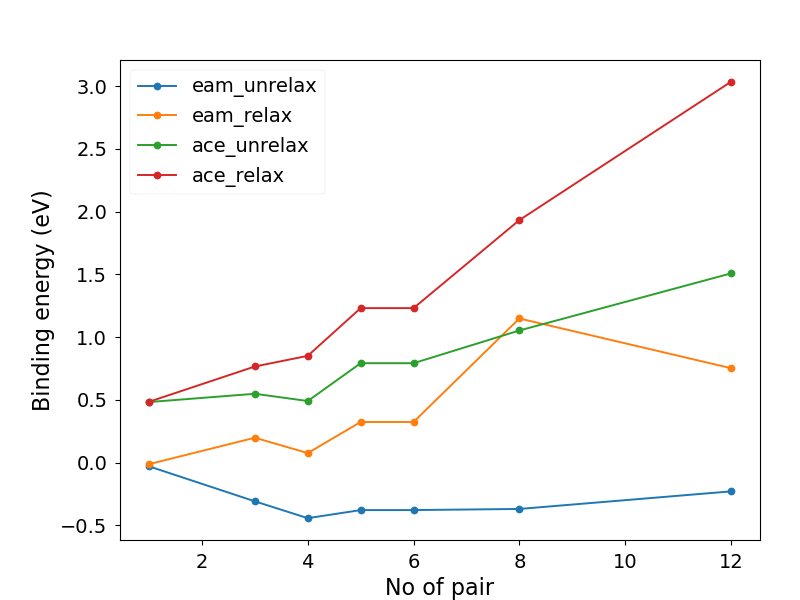

In [133]:
%matplotlib notebook
graph_init()
for key in ['eam','ace']:
    for i in ['unrelax','relax']:
        if i == 'unrelax':
            plt.plot(myresults2[key]['X'],myresults2[key]['divac_e_ur'],'-o',label='{}_{}'.format(key,i))
        if i == 'relax':
            plt.plot(myresults2[key]['X'],myresults2[key]['divac_e_r'],'-o',label='{}_{}'.format(key,i))
        plt.xlabel("No of pair")
        plt.ylabel("Binding energy (eV)")

        plt.subplots_adjust(left=0.15,
                            bottom=0.1, 
                            right=0.95, 
                            top=0.90, 
                            wspace=0.05, 
                            hspace=0.05)
        plt.legend()


In [134]:
np.save('cluster_S6_13.npy',myresults)
test2=np.load('cluster_S6_13.npy',allow_pickle='TRUE')
test2

array({'eam': {'divac_13_e_ur': [-2.219132121126222], 'divac_13_e_r': [-2.8981593613043515], 'divac_13_f_ur': [11.449020019848376], 'divac_13_f_r': [11.008564119276343], 'Ef_13_ur': 0.7691573248935129, 'Ef_13_r': 0.6758670631643326}, 'ace': {'divac_13_e_ur': [-2.1682756506888836], 'divac_13_e_r': [-0.0659079228526025], 'divac_13_f_ur': [11.839063074869046], 'divac_13_f_r': [9.20883515771402], 'Ef_13_ur': 0.8058989520150135, 'Ef_13_r': 0.7619106029051181}},
      dtype=object)